In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

* focus is often a visual representation of the data 


In [3]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

date       US   Brazil    India  Russia   Spain  United Kingdom  \
213  2020-08-22  5667112  3582362  3044940  949531  386054          326595   
212  2020-08-21  5622540  3532330  2975701  944671  386054          325263   
211  2020-08-20  5573847  3501975  2905825  939833  377906          324203   
210  2020-08-19  5529824  3456652  2836925  935066  370867          323008   
209  2020-08-18  5482416  3407354  2767253  930276  364196          322177   

      Italy    Peru    Iran  ...  Timor-Leste  Grenada  Fiji  Saint Lucia  \
213  258136  576067  356792  ...           26       24    28           26   
212  257065  567059  354764  ...           25       24    28           26   
211  256118  558420  352558  ...           25       24    28           26   
210  255278  549321  350279  ...           25       24    28           26   
209  254636  541493  347835  ...           25       24    28           26   

     Laos  Dominica  Saint Kitts and Nevis  Holy See  MS Zaandam  \
213    22        19                     17        12           9   
212    22        18                     17        12           9   
211    22        18                     17        12           9   
210    22        18                     17        12           9   
209    22        18                     17        12           9   

     Western Sahara  
213              10  
212              10  
211              10  
210              10  
209              10  

[5 rows x 189 columns]

# Matplotlib Example

/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1152x648 with 0 Axes>

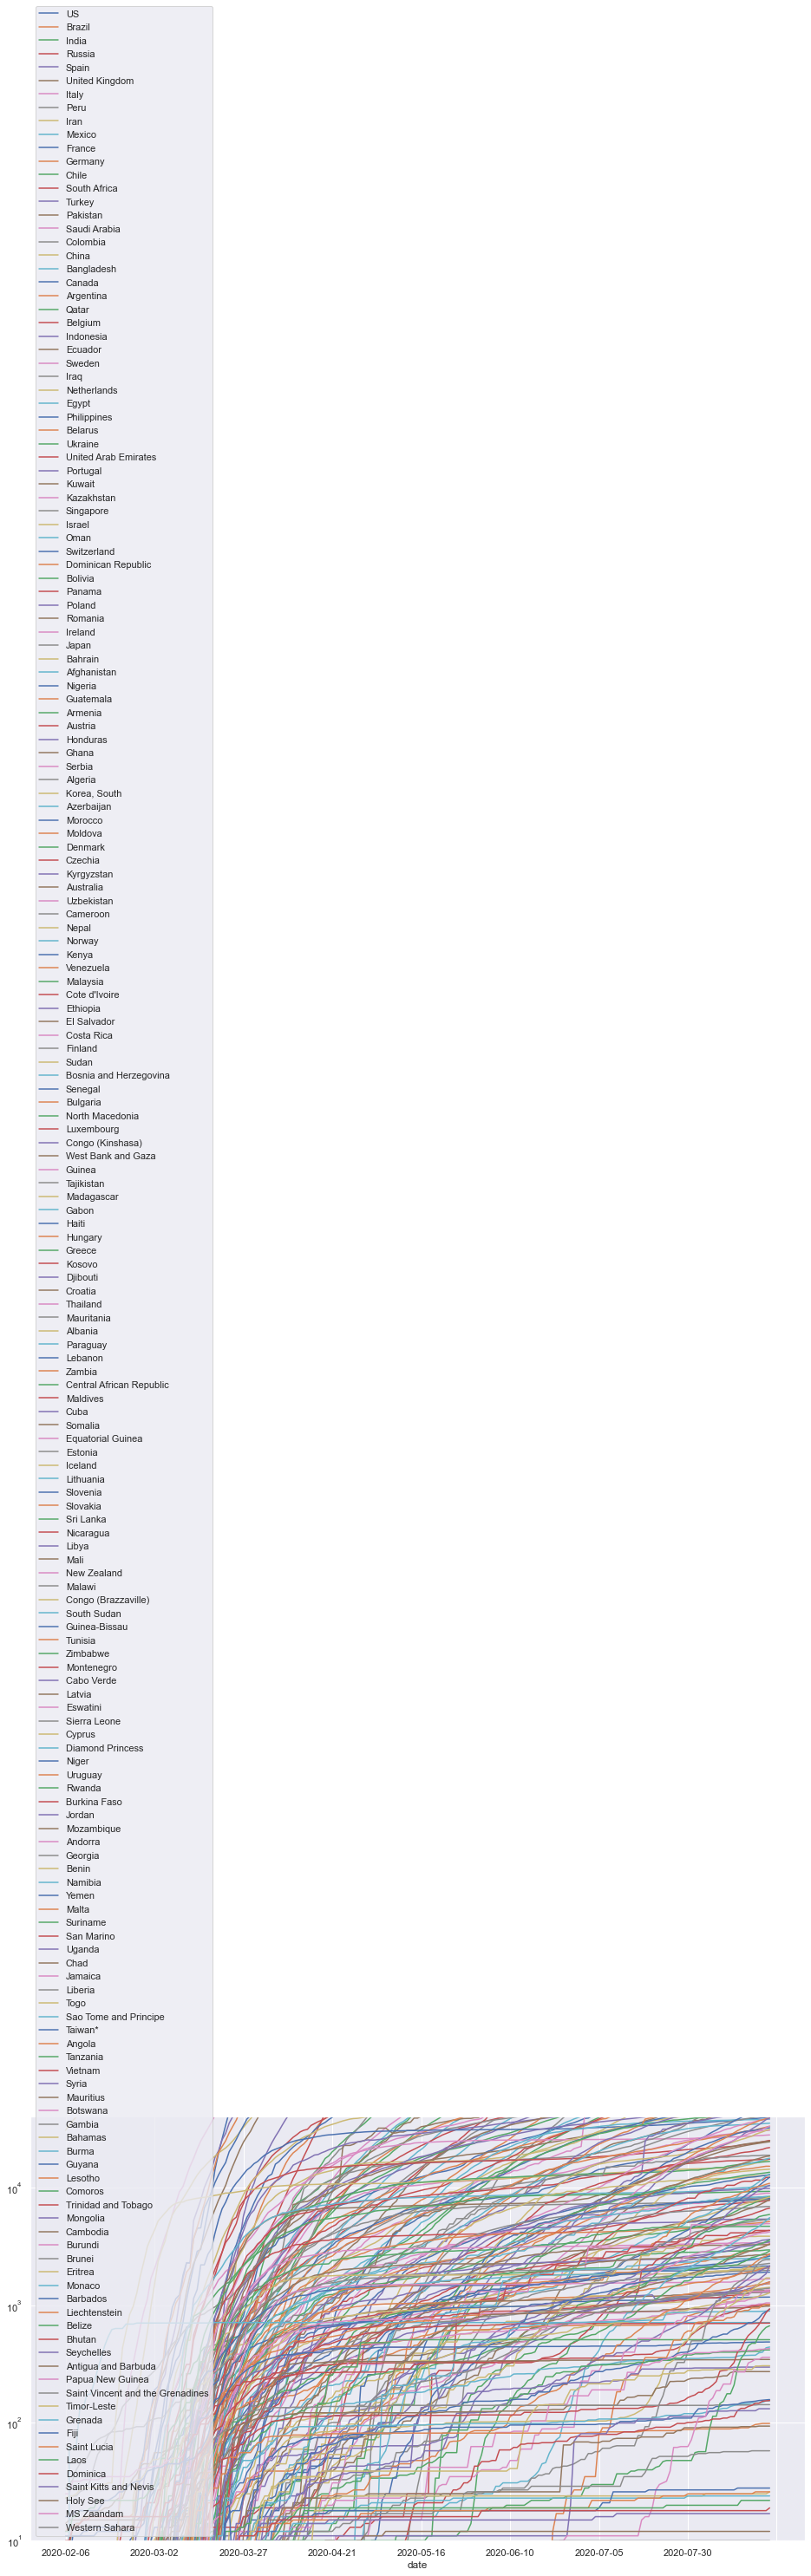

In [4]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 40000)
ax.set_yscale('log')

# Plot.ly

In [5]:
import plotly.graph_objects as go

In [6]:
import plotly
plotly.__version__

'4.5.2'

In [7]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [8]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
fig.show()

In [9]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])






In [10]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [11]:
# take care to press stop button befor calling once again, since address will be blocked (server up)
# if you have problems to find (kill) the process, use the following cmd commands (Linux)
# sudo lsof -n -i :8050 | grep LISTEN 
# kill -9 pid 

app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Debugger PIN: 800-386-458
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use